In [2]:
import pandas as pd
wine_dataset= pd.read_csv("winequality-red.csv")
# Check basic info about dataset
print(wine_dataset.info())

# Check if there are any missing values
print(wine_dataset.isnull().sum())
wine_dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


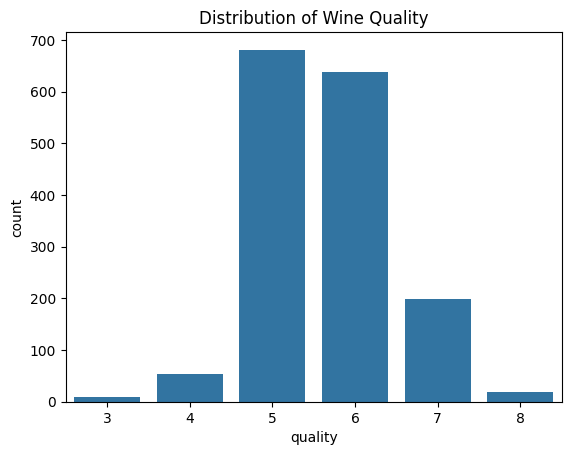

In [3]:
#number of values for each quality level
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='quality',data=wine_dataset)
plt.title('Distribution of Wine Quality')
plt.show()


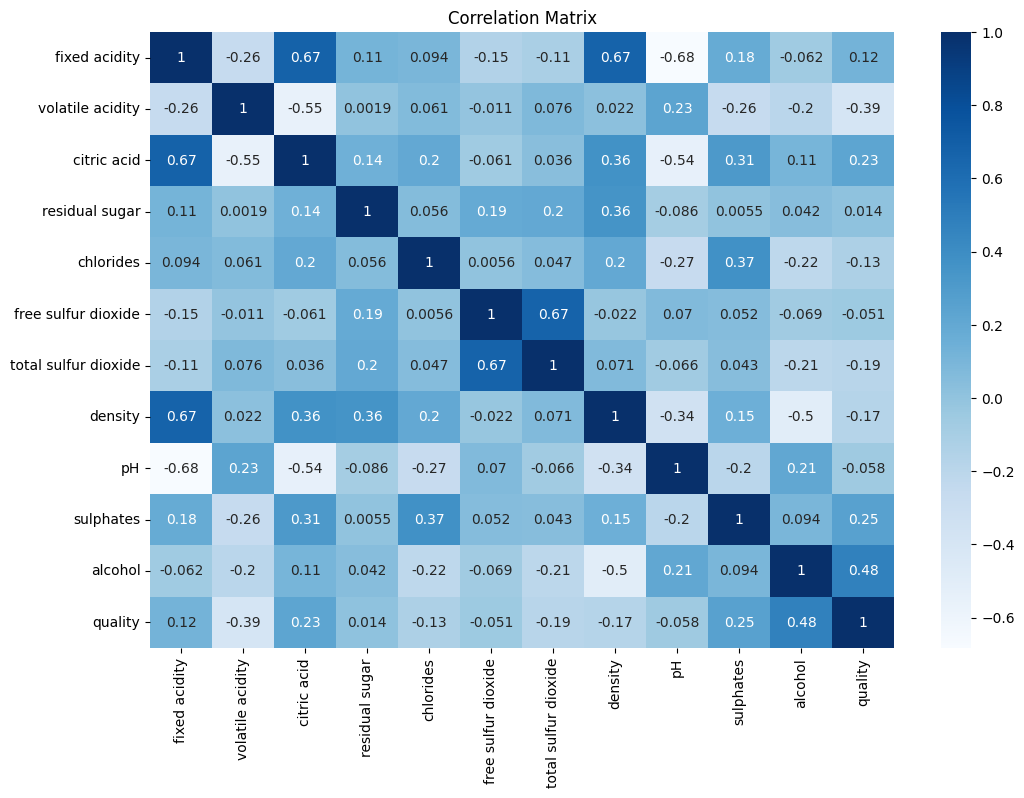

In [4]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(wine_dataset.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()
    

In [5]:
# Calculate correlation of all features with 'quality'
#correlation can be positive,negative or zero
correlations = wine_dataset.corr()['quality'].drop('quality')  
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Print the sorted correlations with original sign
for feature in correlations_sorted.index:
    print(f"{feature}: {correlations[feature]:.2f}")

alcohol: 0.48
volatile acidity: -0.39
sulphates: 0.25
citric acid: 0.23
total sulfur dioxide: -0.19
density: -0.17
chlorides: -0.13
fixed acidity: 0.12
pH: -0.06
free sulfur dioxide: -0.05
residual sugar: 0.01


In [6]:
#seperate data and label
X = wine_dataset.drop('quality', axis=1)
print(X)



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [7]:
#set binary target variable
Y = wine_dataset['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(Y)




0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [8]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=3) #yeta chai Y_train and Y_test is just the label for data in X_train and X_test
print(Y.shape,Y_train.shape,Y_test.shape)


(1599,) (1279,) (320,)


In [9]:
#training this model
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train,Y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
#model evaluation
#accuracy on testdata
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.9375


In [11]:
import numpy as np
#building a predictive system
input_data =( 7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)
input_data_as_numpy_array = np.asarray(input_data)
#changing input_data to a numpy array and reshaping it (reshape chai kina gareko vane reshape garena vane model le sabai data ko lagi khojxa instead of just that array ko data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)    #1 row and -1 columns
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print(" Masta chha! The wine is of good quality.")
else:
    print(" Kasto namitho!The wine is of bad quality. ")

[0]
 Kasto namitho!The wine is of bad quality. 


c:\KATHFORD\5th semester\WineQualityAnalysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
